### Instalação de Bibliotecas
Nesta célula, instalamos as bibliotecas `pycaret` e `pandas` necessárias para o projeto. Utilizamos o comando `%pip` para garantir a instalação no ambiente Jupyter Notebook.

In [16]:
%pip install pycaret pandas

Note: you may need to restart the kernel to use updated packages.


### Importação de Bibliotecas
Nesta célula, importamos diversas bibliotecas essenciais para o projeto. Utilizamos `os` para manipulação de diretórios, `librosa` para processamento de áudio, `numpy` e `pandas` para manipulação de dados, `pycaret` para facilitação do processo de modelagem, `sklearn` para o modelo LDA e avaliação de desempenho.

In [6]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pycaret.classification import save_model, setup
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import (classification_report)
from sklearn.model_selection import cross_val_score, train_test_split

### Exibição de Espectrograma
Nesta célula, criamos uma função `plot_spectrogram` que exibe o espectrograma de um arquivo de áudio. Usamos `librosa` para carregar o arquivo e calcular o espectrograma de frequência mel, que é exibido usando `matplotlib`. A função é exemplificada com um arquivo da pasta de áudio de ruído.


In [8]:
# Função para exibir o espectrograma de um arquivo de áudio
def plot_spectrogram(file_path):
    y, sr = librosa.load(file_path, sr=None)
    plt.figure(figsize=(10, 4))
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()

### Exibição de Gráfico de Áudio
Nesta célula, criamos uma função `plot_waveform` que exibe o gráfico de um arquivo de áudio. Usamos `librosa` para carregar o arquivo e `matplotlib` para exibir a forma de onda. A função é exemplificada com o mesmo arquivo da célula anterior.

In [9]:
# Função para exibir o gráfico de um arquivo de áudio
def plot_waveform(file_path):
    y, sr = librosa.load(file_path, sr=None)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

### Definição dos Caminhos e Função para Extração de Features
Definimos os caminhos para os diretórios contendo os áudios das classes 'ruído' e 'barco'. A função `extract_features` é responsável por extrair várias características dos arquivos de áudio usando a biblioteca `librosa`. Esses recursos incluem medidas espectrais e MFCCs (Mel-Frequency Cepstral Coefficients), que são comumente usados na análise de áudio. Em seguida, combinamos os dados extraídos e os salvamos em um arquivo CSV.

In [20]:
# Caminhos para as pastas de áudio
pasta_ruido = r'../audios/audios_treinamento/classe_ruido'
pasta_barco = r'../audios/audios_treinamento/classe_barco'

# Função para extrair features dos áudios
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    features = {
        'chroma_stft': librosa.feature.chroma_stft(y=y, sr=sr).mean(),
        'chroma_cqt': librosa.feature.chroma_cqt(y=y, sr=sr).mean(),
        'chroma_cens': librosa.feature.chroma_cens(y=y, sr=sr).mean(),
        'rmse': librosa.feature.rms(y=y).mean(),
        'spectral_centroid': librosa.feature.spectral_centroid(y=y, sr=sr).mean(),
        'spectral_bandwidth': librosa.feature.spectral_bandwidth(y=y, sr=sr).mean(),
        'spectral_contrast': librosa.feature.spectral_contrast(y=y, sr=sr).mean(),
        'spectral_flatness': librosa.feature.spectral_flatness(y=y).mean(),
        'spectral_rolloff': librosa.feature.spectral_rolloff(y=y, sr=sr).mean(),
        'zero_crossing_rate': librosa.feature.zero_crossing_rate(y).mean(),
        'mfcc1': librosa.feature.mfcc(y=y, sr=sr)[0].mean(),
        'mfcc2': librosa.feature.mfcc(y=y, sr=sr)[1].mean(),
        'mfcc3': librosa.feature.mfcc(y=y, sr=sr)[2].mean(),
        # 'mfcc4': librosa.feature.mfcc(y=y, sr=sr)[3].mean(),
        # 'mfcc5': librosa.feature.mfcc(y=y, sr=sr)[4].mean(),
        # 'mfcc6': librosa.feature.mfcc(y=y, sr=sr)[5].mean(),
        # 'mfcc7': librosa.feature.mfcc(y=y, sr=sr)[6].mean(),
        # 'mfcc8': librosa.feature.mfcc(y=y, sr=sr)[7].mean(),
        # 'mfcc9': librosa.feature.mfcc(y=y, sr=sr)[8].mean(),
        # 'mfcc10': librosa.feature.mfcc(y=y, sr=sr)[9].mean(),
        # 'mfcc11': librosa.feature.mfcc(y=y, sr=sr)[10].mean(),
        # 'mfcc12': librosa.feature.mfcc(y=y, sr=sr)[11].mean(),
        # 'mfcc13': librosa.feature.mfcc(y=y, sr=sr)[12].mean(),
        #'tempo': librosa.beat.tempo(y=y, sr=sr)[0]
    }
    return features

# Função para processar as pastas e adicionar os dados ao DataFrame
def verifica_pastas(folder_path, label):
    data = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_path.endswith('.wav'):
            features = extract_features(file_path)
            features['label'] = label
            data.append(features)
    return data

# Processar as duas pastas sendo cada uma uma classe
dados_ruido = verifica_pastas(pasta_ruido, 1)
dados_barco = verifica_pastas(pasta_barco, 2)

# Combinar os dados e criar um DataFrame
data = dados_ruido + dados_barco
df = pd.DataFrame(data)

# Salvar em um arquivo CSV
df.to_csv("csv/features_audios_classificados.csv", index=False)

## Definindo uma fonte padrão
A seguir definimos a fonte `DejaVu Sans` como padrão para evitar poluição visual em casos onde as fontes comumente usadas não se encontram no sistema

In [11]:
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

### Exibição de Espectrograma

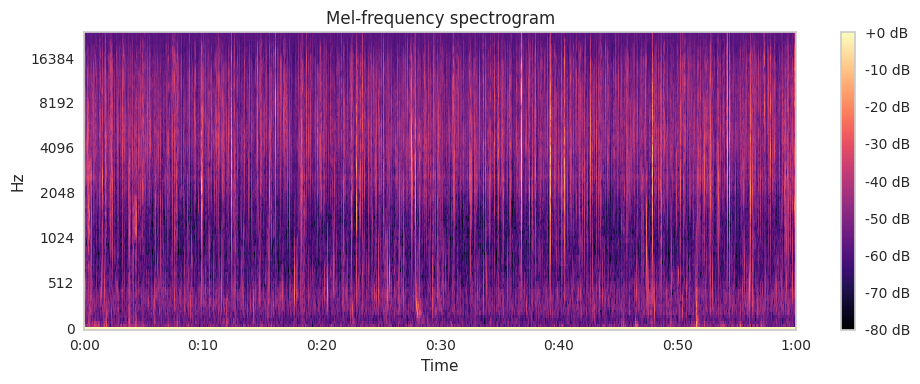

In [10]:
pasta_ruido = r'../audios/audios_treinamento/classe_ruido'
pasta_barco = r'../audios/audios_treinamento/classe_barco'
file_path = os.path.join(pasta_ruido, os.listdir(pasta_ruido)[0])
plot_spectrogram(file_path)

### Exibição de Gráfico de Áudio

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

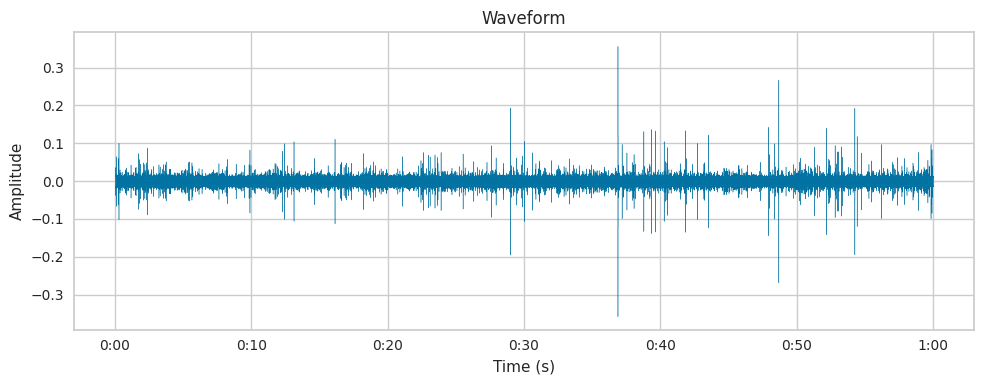

In [7]:
plot_waveform(file_path)

### Treinamento do Modelo LDA
Carregamos os dados salvos no CSV e separamos os atributos (`X`) e os rótulos (`y`). Criamos uma instância do modelo `LinearDiscriminantAnalysis` e a treinamos com os dados. Em seguida, avaliamos o modelo utilizando validação cruzada, calculando a precisão média das predições.

In [ ]:
dados = pd.read_csv("csv/features_audios_classificados.csv")
X = dados.drop(columns=['label'])
y = dados['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

lda_model = LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)
lda_model.fit(X_train, y_train)


scores = cross_val_score(lda_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {np.mean(scores)}")

### Avaliação Adicional do Modelo
Dividimos o conjunto de dados em treinamento e teste para realizar uma avaliação adicional do modelo. Treinamos o modelo com o conjunto de treinamento e geramos previsões para o conjunto de teste. O relatório de classificação é gerado para avaliar o desempenho do modelo em termos de métricas como precisão, recall e F1-score.

In [ ]:
y_pred = lda_model.predict(X_test)
print("Relatório de Classificação para LDA:")
print(classification_report(y_test, y_pred))

### Configuração do Ambiente e Salvamento do Modelo
Utilizamos o `setup` do `pycaret` para configurar o ambiente de classificação com os dados e o alvo definidos. Finalmente, salvamos o modelo treinado usando a função `save_model` do `pycaret`.


In [ ]:
clf1 = setup(data=dados, target='label', session_id=123)
save_model(lda_model, 'Modelo_LDA')